In [10]:
import pandas as pd
import random
import numpy as np
from faker import Faker

In [2]:
recipe_details_df = pd.read_csv("CulinaryDB/01_Recipe_Details.csv")

In [3]:
recipe_details_df.head()

,Recipe ID,Title,Source,Cuisine
0,1,5 spice vegetable fried rice,TARLA_DALAL,Indian Subcontinent
1,2,aachar aaloo,TARLA_DALAL,Indian Subcontinent
2,3,aadu lassan keri nu athanu,TARLA_DALAL,Indian Subcontinent
3,4,aaloo kofta,TARLA_DALAL,Indian Subcontinent
4,5,aaloo tamatar subzi,TARLA_DALAL,Indian Subcontinent


## Recipe Preference data

In [6]:
category = {'Vegan' : ['smoothie', 'vegie', 'vegan'],
            'Beverage' : ['drink', 'tea', 'coffee', 'chai', 'beverage'],
            'Bowls' : ['bowls', 'rice'],
            'Seafoods' : ['fish', 'sushi', 'shrimp', 'salmon'],
            'Pizza' : ['pizza'],
            'Pastas' : ['pasta', 'pastas', 'noodles', 'alferedo'],
            'Salad': ['salad','salads'],
            'International Dishes' : ['curry', 'rolls', 'aloo'],
            'Meats': ['chicken', 'bbq', 'beef', 'ribs', 'ham', 'pork', 'meat', 'lamb', 'crab', 'egg', 'kebab', 'kebabs'],
            'Sauce' : ['sauce'],
            'Soups' : ['soup', 'soups', 'stew', 'stews'],
            'Desserts' : ['pie', 'chocolate', 'tiramisu', 'cake', 'pastereis', 'pastry', 'sorbet', 'dessert']}

In [8]:
recipe_details_df['Category'] = 'Other'

for cat, keywords in category.items():
    mask = recipe_details_df['Title'].apply(lambda x: any(keyword in x.lower() for keyword in keywords))
    recipe_details_df.loc[mask, 'Category'] = cat

In [9]:
recipe_details_df

,Recipe ID,Title,Source,Cuisine,Category
0,1,5 spice vegetable fried rice,TARLA_DALAL,Indian Subcontinent,Bowls
1,2,aachar aaloo,TARLA_DALAL,Indian Subcontinent,International Dishes
2,3,aadu lassan keri nu athanu,TARLA_DALAL,Indian Subcontinent,Other
3,4,aaloo kofta,TARLA_DALAL,Indian Subcontinent,International Dishes
4,5,aaloo tamatar subzi,TARLA_DALAL,Indian Subcontinent,International Dishes
...,...,...,...,...,...
45767,45768,Strawberries & Cream Frappé,EPICURIOUS,USA,Other
45768,45769,Chocolate Whiskey Bundt Cake,EPICURIOUS,USA,Desserts
45769,45770,"Wild Rice with Butternut Squash, Leeks, and Corn",EPICURIOUS,USA,Bowls
45770,45771,Fruit Crumble,EPICURIOUS,USA,Other


## Testing

In [35]:
recipe_details_df[(recipe_details_df['Category'] == 'Other')]['Cuisine'].unique()

array(['Indian Subcontinent', 'Africa', 'China', 'Thailand',
       'South East Asia', 'Middle East', 'Korea', 'Japan',
       'Australia & NZ', 'Mexico', 'Caribbean', 'South America',
       'Misc.: Belgian', 'DACH Countries', 'Greece', 'France',
       'Misc.: Portugal', 'Italy', 'Misc.: Dutch', 'British Isles',
       'Scandinavia', 'Eastern Europe', 'Spain', 'USA', 'Canada',
       'Misc.: Central America'], dtype=object)

In [38]:
recipe_details_df[(recipe_details_df['Category'] == 'Other') & (recipe_details_df['Cuisine'] == 'Canada')]

,Recipe ID,Title,Source,Cuisine,Category
17701,17702,Zesty Lemon Loaf,ALLRECIPES,Canada,Other
17702,17703,Maple Butter Tarts with Raisins,ALLRECIPES,Canada,Other
17705,17706,Healthier Macaroni and Cheese,ALLRECIPES,Canada,Other
17706,17707,Pickled Beets,ALLRECIPES,Canada,Other
17710,17711,Daddio's Hacked Orange Julius®,ALLRECIPES,Canada,Other
...,...,...,...,...,...
34693,34694,Maple Citrus Granite,FOOD_NETWORK,Canada,Other
34696,34697,"Apple, Potato and Onion Hash",FOOD_NETWORK,Canada,Other
34697,34698,French Canadian (Not Boston) Baked Beans,FOOD_NETWORK,Canada,Other
34699,34700,Canadian Benny's,FOOD_NETWORK,Canada,Other


In [23]:
recipe_details_df['Category'].value_counts()

Category
Other                   23303
Meats                    7114
Desserts                 4002
Sauce                    2578
Salad                    2166
Soups                    2116
Seafoods                 1500
Beverage                  735
Bowls                     689
Pastas                    551
International Dishes      547
Pizza                     385
Vegan                      86
Name: count, dtype: int64

## Creating recipe preference db

In [65]:
category_list = recipe_details_df['Category'].value_counts().index
category_list_weight = recipe_details_df['Category'].value_counts().values
# preferred_Category = []

In [66]:
category_list

Index(['Other', 'Meats', 'Desserts', 'Sauce', 'Salad', 'Soups', 'Seafoods',
       'Beverage', 'Bowls', 'Pastas', 'International Dishes', 'Pizza',
       'Vegan'],
      dtype='object', name='Category')

In [67]:
category_list_weight

array([23303,  7114,  4002,  2578,  2166,  2116,  1500,   735,   689,
         551,   547,   385,    86], dtype=int64)

In [44]:
recipe_preference = pd.read_csv("Dataset/Recipe Preference.csv")
recipe_preference.head()

,User ID,Preferred Category,Most Requested Recipes
0,1,NaN,NaN
1,2,NaN,NaN
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN


In [47]:
recipe_preference.shape

(15249, 3)

In [70]:
category_list = recipe_details_df['Category'].value_counts().index
category_list_weight = recipe_details_df['Category'].value_counts().values
random_data = random.choices(category_list, weights=category_list_weight, k=15249)
category_distribution = {category: random_data.count(category) for category in category_list}
print(category_distribution)

{'Other': 7609, 'Meats': 2436, 'Desserts': 1356, 'Sauce': 874, 'Salad': 729, 'Soups': 680, 'Seafoods': 516, 'Beverage': 270, 'Bowls': 234, 'Pastas': 194, 'International Dishes': 190, 'Pizza': 131, 'Vegan': 30}


In [71]:
recipe_preference['Preferred Category'] = random_data

In [72]:
recipe_preference

,User ID,Preferred Category,Most Requested Recipes
0,1,Other,NaN
1,2,Other,NaN
2,3,Meats,NaN
3,4,Desserts,NaN
4,5,Other,NaN
...,...,...,...
15244,15245,Desserts,NaN
15245,15246,Soups,NaN
15246,15247,Other,NaN
15247,15248,Meats,NaN


In [89]:
def fill_most_requested_recipes(user_row):
    preferred_category = user_row['Preferred Category']
    matching_recipes = recipe_details_df[recipe_details_df['Category'] == preferred_category]['Title']
    num_recipes = np.random.randint(1, 3)
    selected_recipes = np.random.choice(matching_recipes, size=num_recipes, replace=False)
    return ', '.join(selected_recipes)

# Apply the function to fill in most requested recipes column
recipe_preference['Most Requested Recipes'] = recipe_preference.apply(fill_most_requested_recipes, axis=1)

In [91]:
recipe_preference

,User ID,Preferred Category,Most Requested Recipes
0,1,Other,"Carolina Wings, Tofu and Artichoke Risotto"
1,2,Other,Blue Cheese Dressing
2,3,Meats,Savory Saffron Chicken Polow
3,4,Desserts,"Brazilian Crab Cakes (Casquinha de Siri), Jamb..."
4,5,Other,"Crime Scene, Ragu Alla Bolognese"
...,...,...,...
15244,15245,Desserts,Nadia's Morning Coffee Cake with Winter Fruits
15245,15246,Soups,"Smokin' Chipotle Pork Stew, Kazakh Beef Soup"
15246,15247,Other,Salsa Borracha (Drunk Salsa)
15247,15248,Meats,"Low Fat Cheesy Spinach and Eggplant Lasagna, G..."


In [92]:
recipe_preference.to_csv("Dataset/Recipe Preference.csv", index= False)

## User Interaction Data

In [95]:
user_iteraction = pd.read_csv("Dataset/User Interaction Data.csv")
user_iteraction

,User ID,Sessions Initiated,Average Time per Session (min),Favorite Recipes,Last Purchase
0,1,5,27.35,"5 spice vegetable fried rice, aachar aaloo, aa...",2023-06-30 16:43:47
1,2,28,8.27,"aaloo kofta, aaloo tamatar subzi, aalu dum",2023-07-20 22:11:34
2,3,14,23.49,"aam aur chane ka achaar, aam ka achaar, aam ki...",2023-01-14 05:43:54
3,4,8,10.39,"aam lassi slush, aam panna, aam pyaj aur lauki...",2023-05-19 06:44:49
4,5,39,21.96,"aam ras ki kadhi, aamabtvaran, aanar ka raita",2023-05-11 21:16:34
...,...,...,...,...,...
15244,15245,8,8.90,"Maple Baked Beans, Rhubarb Compote, Warm Berry...",2023-04-24 14:43:21
15245,15246,23,19.96,"Tamarind-Glazed Turkey Burgers, Rosemary Beef ...",2023-12-30 06:48:01
15246,15247,38,20.19,Grilled Tuna and Peppers with Caper Vinaigrett...,2023-05-26 04:16:25
15247,15248,47,23.27,Chili-Rubbed Baby Back Ribs with Espresso Barb...,2023-11-09 09:10:16


In [96]:
user_iteraction['Favorite Recipes'] = recipe_preference.apply(fill_most_requested_recipes, axis=1)

In [97]:
user_iteraction

,User ID,Sessions Initiated,Average Time per Session (min),Favorite Recipes,Last Purchase
0,1,5,27.35,"Placek, Flo's Clams Casino",2023-06-30 16:43:47
1,2,28,8.27,Fried Sweet Potato Hashbrowns,2023-07-20 22:11:34
2,3,14,23.49,"Scalloped Potatoes with Ham, World Famous Rend...",2023-01-14 05:43:54
3,4,8,10.39,Rustic Apple Pie with Dried Cherries,2023-05-19 06:44:49
4,5,39,21.96,"Herb-Marinated Squid, Mashed Potatoes with Ran...",2023-05-11 21:16:34
...,...,...,...,...,...
15244,15245,8,8.90,Chocolate Banana Crepes,2023-04-24 14:43:21
15245,15246,23,19.96,Chilled Cucumber Soup with Smoked Salmon and Dill,2023-12-30 06:48:01
15246,15247,38,20.19,"Cod Bordelaise, White and Sweet Whipped Potatoes",2023-05-26 04:16:25
15247,15248,47,23.27,"Gotham Sundae, Grilled Lemon-Coriander Chicken",2023-11-09 09:10:16


In [98]:
user_iteraction.to_csv("Dataset/User Interaction Data.csv", index= False)

In [104]:
test_df = user_iteraction.copy()

In [107]:
test_df

,User ID,Sessions Initiated,Average Time per Session (min),Favorite Recipes,Last Purchase
0,1,5,27.35,"Placek, Flo's Clams Casino",2023-06-30 16:43:47
1,2,28,8.27,Fried Sweet Potato Hashbrowns,2023-07-20 22:11:34
2,3,14,23.49,"Scalloped Potatoes with Ham, World Famous Rend...",2023-01-14 05:43:54
3,4,8,10.39,Rustic Apple Pie with Dried Cherries,2023-05-19 06:44:49
4,5,39,21.96,"Herb-Marinated Squid, Mashed Potatoes with Ran...",2023-05-11 21:16:34
...,...,...,...,...,...
15244,15245,8,8.90,Chocolate Banana Crepes,2023-04-24 14:43:21
15245,15246,23,19.96,Chilled Cucumber Soup with Smoked Salmon and Dill,2023-12-30 06:48:01
15246,15247,38,20.19,"Cod Bordelaise, White and Sweet Whipped Potatoes",2023-05-26 04:16:25
15247,15248,47,23.27,"Gotham Sundae, Grilled Lemon-Coriander Chicken",2023-11-09 09:10:16


In [111]:
test_df['Last Purchase'] = test_df['Last Purchase'].apply(lambda x: x.split()[0])

In [113]:
test_df.to_csv("Dataset/User Interaction Data.csv", index= False)

## Delivery Preference

In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [223]:
deliver_preference_db = pd.read_csv("Dataset/delivery_preference.csv")

In [224]:
deliver_preference_db.head()

,User ID,Delivery Address,Delivery Frequency,Preferred Delivery Day,Latitude,Longitude
0,1,"2940 Holt Burgs, Sarnia, ON",3,"Sunday, Thursday, Saturday",42.9745,-82.4066
1,2,"6160 Ian Alley, Clarence-Rockland, ON",5,"Monday, Thursday, Tuesday, Sunday, Wednesday",45.5887,-75.5127
2,3,"28788 Black Grove, Chatham, ON",4,"Friday, Monday, Tuesday, Thursday",42.4254,-82.1892
3,4,"673 Barnes Wall, Greater Sudbury, ON",6,"Friday, Wednesday, Sunday, Monday, Tuesday, Sa...",46.4900,-80.9900
4,5,"2389 Wallace Neck, London, ON",5,"Thursday, Tuesday, Saturday, Sunday, Monday",42.9849,-81.2453


### Done

In [150]:
mean = 4
std = 1.5

delivery_frequency = np.random.normal(loc= mean, scale= std, size=15249, )
delivery_frequency = np.clip(delivery_frequency, 1, 7)
delivery_frequency = np.round(np.abs(delivery_frequency), decimals= 0)
delivery_frequency = delivery_frequency.astype(int)
delivery_frequency

array([3, 5, 4, ..., 4, 3, 4])

In [151]:
test_df = deliver_preference_db.copy()

In [152]:
test_df['Delivery Frequency'] = delivery_frequency

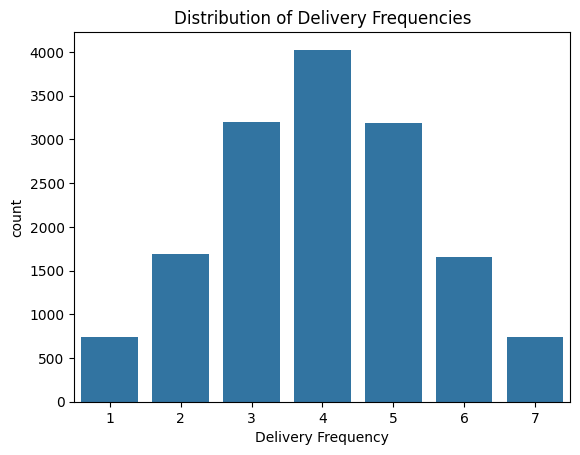

In [153]:
sns.countplot(x='Delivery Frequency', data= test_df)
plt.title('Distribution of Delivery Frequencies')
plt.show()

In [154]:
test_df

,User ID,Delivery Address,Delivery Frequency,Preferred Delivery Day
0,1,"2940 Holt Burgs, Sarnia, ON",3,"Friday, Monday, Sunday, Wednesday, Thursday"
1,2,"6160 Ian Alley, Clarence-Rockland, ON",5,Wednesday
2,3,"28788 Black Grove, Chatham, ON",4,"Wednesday, Monday, Sunday, Thursday, Saturday,..."
3,4,"673 Barnes Wall, Greater Sudbury, ON",6,"Thursday, Wednesday, Sunday, Monday, Tuesday, ..."
4,5,"2389 Wallace Neck, London, ON",5,"Sunday, Tuesday"
...,...,...,...,...
15244,15245,"2203 Charles Canyon, Brantford, ON",6,"Friday, Wednesday, Thursday, Sunday, Saturday,..."
15245,15246,"71753 Weber Court, Peterborough, ON",5,"Sunday, Friday, Wednesday, Monday, Thursday, S..."
15246,15247,"9027 Alexander Throughway, Barrie, ON",4,"Wednesday, Friday, Tuesday, Monday, Sunday, Sa..."
15247,15248,"0784 Bennett Unions, Kenora, ON",3,"Friday, Sunday"


In [175]:
day_mapping = {
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday',
    7: 'Sunday'
}

In [165]:
test_df['Delivery Frequency']

0        3
1        5
2        4
3        6
4        5
        ..
15244    6
15245    5
15246    4
15247    3
15248    4
Name: Delivery Frequency, Length: 15249, dtype: int32

In [183]:
test_df

,User ID,Delivery Address,Delivery Frequency,Preferred Delivery Day
0,1,"2940 Holt Burgs, Sarnia, ON",3,"Friday, Monday, Sunday, Wednesday, Thursday"
1,2,"6160 Ian Alley, Clarence-Rockland, ON",5,Wednesday
2,3,"28788 Black Grove, Chatham, ON",4,"Wednesday, Monday, Sunday, Thursday, Saturday,..."
3,4,"673 Barnes Wall, Greater Sudbury, ON",6,"Thursday, Wednesday, Sunday, Monday, Tuesday, ..."
4,5,"2389 Wallace Neck, London, ON",5,"Sunday, Tuesday"
...,...,...,...,...
15244,15245,"2203 Charles Canyon, Brantford, ON",6,"Friday, Wednesday, Thursday, Sunday, Saturday,..."
15245,15246,"71753 Weber Court, Peterborough, ON",5,"Sunday, Friday, Wednesday, Monday, Thursday, S..."
15246,15247,"9027 Alexander Throughway, Barrie, ON",4,"Wednesday, Friday, Tuesday, Monday, Sunday, Sa..."
15247,15248,"0784 Bennett Unions, Kenora, ON",3,"Friday, Sunday"


In [196]:
def update_display(x, day_mapping):
    result = []
    temp_len = 0
    updated_day = []
    while temp_len < x:
        random_number = random.randint(1, 7)
        if random_number not in result:
            result.append(random_number)
            updated_day.append(day_mapping[random_number])
            temp_len += 1
    return (", ".join(updated_day))

In [197]:
test_df['Preferred Delivery Day'] = test_df['Delivery Frequency'].apply(lambda x: update_display(x, day_mapping))

In [198]:
test_df

,User ID,Delivery Address,Delivery Frequency,Preferred Delivery Day
0,1,"2940 Holt Burgs, Sarnia, ON",3,"Sunday, Thursday, Saturday"
1,2,"6160 Ian Alley, Clarence-Rockland, ON",5,"Monday, Thursday, Tuesday, Sunday, Wednesday"
2,3,"28788 Black Grove, Chatham, ON",4,"Friday, Monday, Tuesday, Thursday"
3,4,"673 Barnes Wall, Greater Sudbury, ON",6,"Friday, Wednesday, Sunday, Monday, Tuesday, Sa..."
4,5,"2389 Wallace Neck, London, ON",5,"Thursday, Tuesday, Saturday, Sunday, Monday"
...,...,...,...,...
15244,15245,"2203 Charles Canyon, Brantford, ON",6,"Tuesday, Monday, Sunday, Saturday, Wednesday, ..."
15245,15246,"71753 Weber Court, Peterborough, ON",5,"Friday, Saturday, Wednesday, Thursday, Tuesday"
15246,15247,"9027 Alexander Throughway, Barrie, ON",4,"Friday, Saturday, Tuesday, Monday"
15247,15248,"0784 Bennett Unions, Kenora, ON",3,"Thursday, Wednesday, Monday"


In [199]:
test_df.to_csv("Dataset/delivery_preference.csv", index= False)

In [203]:
city_coordinates = {
    'Sarnia': (42.9745, -82.4066),
    'Clarence-Rockland': (45.5887, -75.5127),
    'Chatham': (42.4254, -82.1892),
    'Greater Sudbury': (46.4900, -80.9900),
    'London': (42.9849, -81.2453),
    'Timmins': (48.4758, -81.3305),
    'St. Thomas': (42.7770, -81.1826),
    'Leamington': (42.0501, -82.6060),
    'Markham': (43.8561, -79.3370),
    'Richmond Hill': (43.8828, -79.4407),
    'Kawartha Lakes': (44.4254, -78.7877),
    'Prince Edward County': (43.9991, -77.1240),
    'Port Colborne': (42.8830, -79.2320),
    'Sault Ste. Marie': (46.5208, -84.3469),
    'Barrie': (44.3894, -79.6903),
    'North Bay': (46.3098, -79.4600),
    'Ottawa': (45.4215, -75.6993),
    'Mississauga': (43.5890, -79.6441),
    'Woodstock': (43.1312, -80.7565),
    'Guelph': (43.5448, -80.2482),
    'Cornwall': (45.0185, -74.7397),
    'St. Catharines': (43.1594, -79.2469),
    'Haldimand County': (42.9229, -79.8663),
    'Thorold': (43.1167, -79.2000),
    'Kitchener': (43.4504, -80.4825),
    'Brant': (43.1420, -80.2681),
    'Cambridge': (43.3601, -80.3127),
    'Thunder Bay': (48.3820, -89.2466),
    'Brockville': (44.5895, -75.6844),
    'Elliot Lake': (46.3848, -82.6493),
    'Dryden': (49.7839, -92.8363),
    'Vaughan': (43.8361, -79.4982),
    'Owen Sound': (44.5668, -80.9405),
    'Waterloo': (43.4643, -80.5204),
    'Brantford': (43.1394, -80.2644),
    'Pembroke': (45.8260, -77.1099),
    'Temiskaming Shores': (47.5087, -79.6770),
    'Kingston': (44.2312, -76.4860),
    'Kenora': (49.7661, -94.4894),
    'Burlington': (43.3255, -79.7990),
    'Orillia': (44.6087, -79.4200),
    'Niagara Falls': (43.0896, -79.0849),
    'Brampton': (43.7315, -79.7624),
    'Stratford': (43.3712, -80.9818),
    'Peterborough': (44.3091, -78.3197),
    'Welland': (42.9918, -79.2359),
    'Toronto': (43.6532, -79.3832),
    'Windsor': (42.3149, -83.0364),
    'Oshawa': (43.8975, -78.8635),
    'Quinte West': (44.1802, -77.3711),
    'Pickering': (43.8358, -79.3483),
    'Hamilton': (43.2557, -79.8711),
    'Norfolk County': (42.8429, -80.8649),
    'Belleville': (44.1636, -77.3835)
}

In [204]:
data = deliver_preference_db["Delivery Address"].apply(lambda x: x.split(", ")[1])

In [208]:
data.values

array(['Sarnia', 'Clarence-Rockland', 'Chatham', ..., 'Barrie', 'Kenora',
       'Markham'], dtype=object)

In [206]:
test_df = deliver_preference_db.copy()

In [212]:
latitude = []
longitude = []
for i in data.values:
    latitude.append(city_coordinates[i][0])
    longitude.append(city_coordinates[i][1])

In [215]:
test_df['Latitude'] = latitude
test_df['Longitude'] = longitude

In [217]:
test_df.to_csv("Dataset/delivery_preference.csv", index= False)

### Edit

In [225]:
deliver_preference_db['City'] = deliver_preference_db['Delivery Address'].apply(lambda x: x.split(", ")[1])

In [226]:
deliver_preference_db.head()

,User ID,Delivery Address,Delivery Frequency,Preferred Delivery Day,Latitude,Longitude,City
0,1,"2940 Holt Burgs, Sarnia, ON",3,"Sunday, Thursday, Saturday",42.9745,-82.4066,Sarnia
1,2,"6160 Ian Alley, Clarence-Rockland, ON",5,"Monday, Thursday, Tuesday, Sunday, Wednesday",45.5887,-75.5127,Clarence-Rockland
2,3,"28788 Black Grove, Chatham, ON",4,"Friday, Monday, Tuesday, Thursday",42.4254,-82.1892,Chatham
3,4,"673 Barnes Wall, Greater Sudbury, ON",6,"Friday, Wednesday, Sunday, Monday, Tuesday, Sa...",46.4900,-80.9900,Greater Sudbury
4,5,"2389 Wallace Neck, London, ON",5,"Thursday, Tuesday, Saturday, Sunday, Monday",42.9849,-81.2453,London


In [229]:
deliver_preference_db.to_csv("Dataset/delivery_preference.csv", index= False)